# Sesión 2 Apartado 2: Evaluación de modelos

Objetivo: Aprender y aplicar métricas: precisión, recall, F1, AUC, matriz de confusión, curvas ROC y PR.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=800, n_features=12, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

## Métricas importantes
- Accuracy (Exactitud): proporción de predicciones correctas.

  Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)

- Precision (Precisión): de las predicciones positivas, la fracción que son verdaderos positivos.

  Formula: Precision = TP / (TP + FP)

- Recall (Sensibilidad o Exhaustividad): de los positivos reales, la fracción que el modelo detecta.

  Formula: Recall = TP / (TP + FN)

- F1-score: media armónica de precision y recall.

  Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)

- TPR / FPR (componentes de la curva ROC):
  - TPR (True Positive Rate) = Recall = TP / (TP + FN)
  - FPR (False Positive Rate) = FP / (FP + TN)

- ROC AUC: área bajo la curva ROC. No hay una fórmula cerrada simple — se calcula numéricamente como la integral del TPR respecto a FPR a través de umbrales.

- Matriz de confusión: tabla 2x2 con conteos:

  | Predicho 0 | Predicho 1 |
  |------------|------------|
  | True Negative (TN) | False Positive (FP) |
  | False Negative (FN) | True Positive (TP) |

- Curva Precision-Recall: relación entre precision y recall para distintos umbrales; útil con clases desbalanceadas.

Usamos `classification_report`, `confusion_matrix`, `roc_auc_score` y visualizaciones para entender el comportamiento del clasificador.

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       124
           1       0.93      0.84      0.88       116

    accuracy                           0.89       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.90      0.89      0.89       240

ROC AUC: 0.9402113459399332


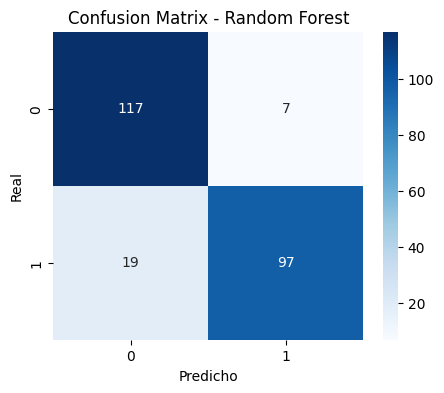

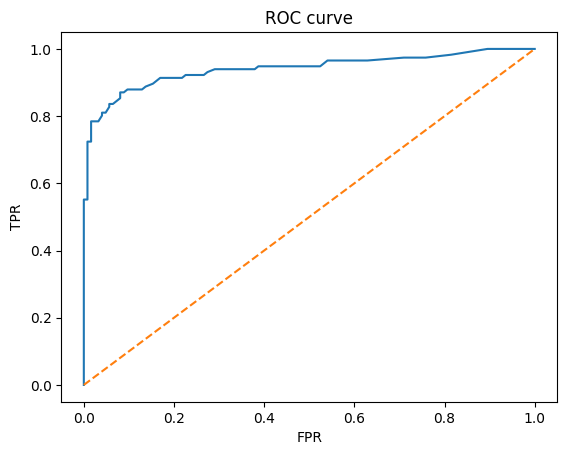

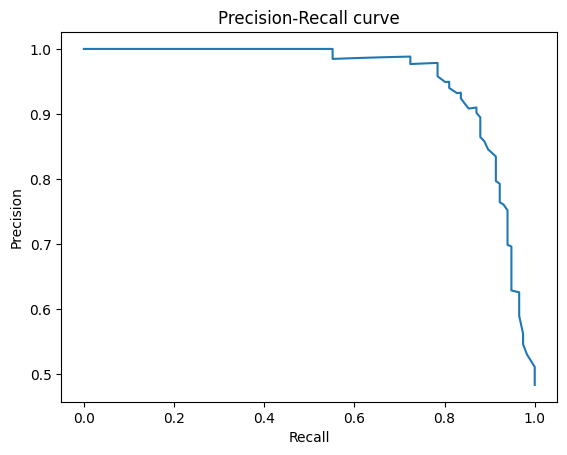

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

print('Classification report:\n')
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Curva ROC y PR (visualización simple)
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()